# TME 8: Split
> Consignes: le fichier TME8_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME8_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! 


In [1]:
from PIL import Image
from pylab import *

### Données
img_test = full((64,64),150,dtype=uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = array(Image.open('images/angiogra.png'))
cam = array(Image.open('images/cameraman.png'))
muscle = array(Image.open('images/muscle.png'))
prisme = array(Image.open('images/prisme.png'))
seiche = array(Image.open('images/seiche.png'))

### Fonction d'affichage
def affichage_14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
    Dffectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    Paramètres :
      - liste des affichages (entre 1 et 4)
      - liste des titres (entre 1 et 4, autant que de affichages), optionnelle    
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    show()



## Exercice 1

Question 1: 
Écrire la fonction récursive ``split()`` vue en TD. Elle prend en entrée l'image, une région, un prédicat, et un nombre variable d'arguments. La région est de type formel Python ```Bloc``` défini par :
```python
type Bloc = tuple[int**4]
```
La fonction ``split()`` retourne un arbre 4-aire de type formel Python, défini récursivement par:
```python
type 4-aire = list[(4-aire**4|Bloc)] 
```
Le prédicat est une fonction Python de signature:
```python
Array*Bloc*...->bool
```
Elle peut prendre un nombre variable de paramètres qui correspond aux paramètres du prédicat.


In [2]:
def split(I,reg,pred,*args):
    """ Array*Bloc*(Array*Bloc*...->bool)*... -> 4-aire
        Découpage de I en arbre 4-aire sur un critère d'écart-type minimal
    """
    x,y,n,m=reg
    if (pred(I,reg,*args) and n>2 and m>2):        
        no=split(I,(x,y,n//2,m//2),pred,*args)
        ne=split(I,(x,y+m//2,n//2,m//2),pred,*args)
        so=split(I,(x+n//2,y,n//2,m//2),pred,*args)
        se=split(I,(x+n//2,y+m//2,n//2,m//2),pred,*args)
        return [no,ne,so,se]
    else:
        return [reg]

Question 2:
Écrire la fonction ```predsplit1(I,B,*args)``` de signature :
```python
Array*Bloc*... -> bool
```
qui retourne True si l'écart-type de l'image ``I`` calculé sur la région ``B`` est plus grand que la valeur du premier argument de ``*args`` (on y accède simplement par ``*args[0]``).

In [3]:
def predsplit1(I,reg,*args):
    """ Array*Bloc*... -> bool
    """ 
    x,y,n,m=reg
    #print(x,y,n,m)
    return I[x:x+n,y:y+m].std()>args[0]

Question 3: Écrire la fonction ``splitprof(L)`` qui réaliste un parcours (récursif) en profondeur de l'arbre 4-aire passé en paramètre. La fonction retourne la liste des feuilles de ``L``, soit une liste de bloc.

In [4]:
def splitprof(L):
    """ 4-aire -> list[Bloc]"""
    if len(L)==1:
        return L
    else:
        res=[]
        for l in L:
            res+=splitprof(l)
        return res

Question 4: Tester vos codes sur l'image test ``img_test`` vue en TD. Imprimer la valeur retournée par ``split()`` ainsi que celle retournée par ``profsplit()``. 

In [5]:
h,w=img_test.shape
#split(img_test,(0,0,h,w),predsplit1,0)
res=splitprof(split(img_test,(0,0,h,w),predsplit1,0))
print(res)

[(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


Question 4: Écrire la fonction ```splitdraw(L,I)``` qui prend en paramètre une liste de bloc et une image et retourne une image dont les bords de chaque éléments de ``L`` ont été dessiné en rouge. Indication: l'image retournée est une hypermatrice de dimension 3, la troisième dimension a une taille de 3 et correspond aux composantes rouge, verte et bleue d'une image RGB. Tester son bon fonctionnement sur l'exemple précédent.


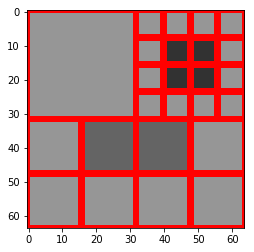

In [6]:
def splitdraw(LL,I):
    """ list[Bloc]*Array -> Array
        parcours de la liste dessin des régions 
    """
    h,w=I.shape
    RGB=zeros((h,w,3))
    RGB[:,:,0]=RGB[:,:,1]=RGB[:,:,2]=I
    for i in LL:
        x,y,n,m=i
        RGB[x:x+n,y,0:3]=[255,0,0]
        RGB[x,y:y+m,0:3]=[255,0,0]
        #RGB[x:x+n,y+m-1,0:3]=[255,0,0]
        #RGB[x+n-1,y:y+m,0:3]=[255,0,0]
    RGB=RGB.astype(np.uint8)
    return RGB

imshow(splitdraw(res,img_test))

Question 5: Ajouter un bruit gaussien sur l'image ``img_test`` d'écart-type 5. Recalculer un découpage 4-aire sur l'image bruitée en ajustant le seuil de façon à obtenir le même résultat que dans la question précédente. Quelle valeur de seuil a-t-il fallut choisir ? Cela vous semble-t-il cohérent ?

Indication: utiliser la fonction Numpy ``random.randn()`` qui génère des valeurs aléatoires tirées selon une loi normale (loi gaussienne de moyenne nulle et de variance 1). Pour obtenir des réalisations d'une gaussienne d'écart type $\sigma$, il suffit de faire des tirages d'une loi normale, multipliés par $\sigma$. 

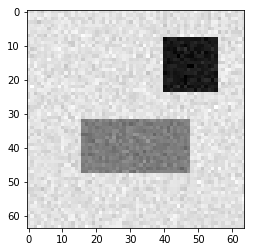

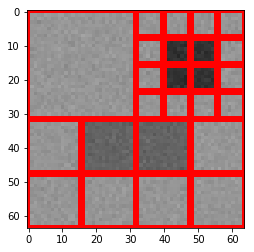

In [7]:
from numpy import random
h,w=img_test.shape
bruit=random.randn(h,w)*5
img_bruite=img_test+bruit
affichage_14(img_bruite)
#imshow(img_bruite)

res_bruite=splitprof(split(img_bruite,(0,0,h,w),predsplit1,10))
imshow(splitdraw(res_bruite,img_bruite))

# Exercice 2
Question 1:
Expérimenter l'algorithme de split sur les 4 images naturelles fournie. Pour chaque image essayer de trouver le seuil qui vous semble visuellement le meilleur. Afficher le nombre de bloc obtenus après découpage.

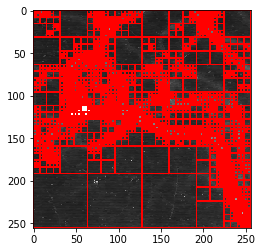

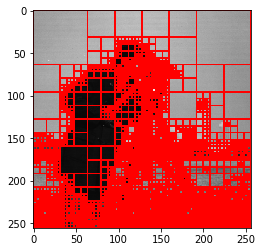

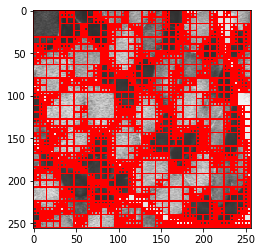

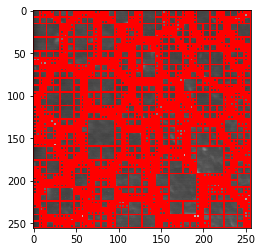

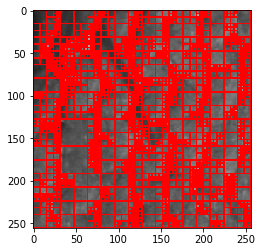

In [8]:
h,w=angio.shape
imshow(splitdraw(splitprof(split(angio,(0,0,h,w),predsplit1,10)),angio))
plt.show()

h,w=cam.shape
imshow(splitdraw(splitprof(split(cam,(0,0,h,w),predsplit1,9)),cam))
plt.show()

h,w=muscle.shape
imshow(splitdraw(splitprof(split(muscle,(0,0,h,w),predsplit1,20)),muscle))
plt.show()

h,w=prisme.shape
imshow(splitdraw(splitprof(split(prisme,(0,0,h,w),predsplit1,12)),prisme))
plt.show()

h,w=seiche.shape
imshow(splitdraw(splitprof(split(seiche,(0,0,h,w),predsplit1,11)),seiche))
plt.show()

Question 2 (bonus): proposer un critère de découpage alternatif. Par exemple, un critère basé sur des contours ou un autre. Le critère peut être adapté à chaque type d'image.
